### **1. Importing libraries**

In [1]:
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## **2. Uploading databases uploaded to Google Drive**

In [62]:
from google.colab import drive
drive.mount("/content/drive")

df_cities =  pd.read_csv("/content/drive/MyDrive/Machine Learning/DataGlacier/week 2/Dataset/City.csv")
df_customers =  pd.read_csv("/content/drive/MyDrive/Machine Learning/DataGlacier/week 2/Dataset/Customer_ID.csv")
df_transaction =  pd.read_csv("/content/drive/MyDrive/Machine Learning/DataGlacier/week 2/Dataset/Transaction_ID.csv")
df_cab_data =  pd.read_csv("/content/drive/MyDrive/Machine Learning/DataGlacier/week 2/Dataset/Cab_Data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **3. Reading each database**

In [55]:
# City Database: City, Population y Users
df_cities.tail()

,City,Population,Users
15,SACRAMENTO CA,545776,7044
16,PITTSBURGH PA,542085,3643
17,WASHINGTON DC,418859,127001
18,NASHVILLE TN,327225,9270
19,BOSTON MA,248968,80021


In [56]:
# Customer Database: Customer ID, Gender, Age, Income (USD/Month)
df_customers.tail()

,Customer_ID,Gender,Age,Income_(USD/Month)
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454
49170,39761,Female,32,10128


In [57]:
# Transaction Database : Transaction ID, Customer ID, Payment_Mode
df_transaction.tail()

,Transaction_ID,Customer_ID,Payment_Mode
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card
440097,10440108,51587,Card


In [58]:
# CabData Database: Transaction ID, Date of Travel, Company, City, KM Travelled, Price Charged, Cost of Trip
df_cab_data.tail()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,1,2018
359391,10440107,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,1,2018


## **4. Null Data Validation**




In [59]:
# Null Data Validation of City Database
df_cities.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [8]:
# Null Data Validation of Customer Database
df_customers.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [9]:
# Null Data Validation of Transaction Database 
df_transaction.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [10]:
# Null Data Validation of Cab_Data Database 
df_cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

## **5. Data Cleansing**

In [63]:
# Rename columns with blank spaces
def rename_columns(df):
  for col in df.columns:
    if ' ' in col:
      df = df.rename(columns={col:col.replace(' ','_')})
  return df

df_cities = rename_columns(df_cities)
df_customers = rename_columns(df_customers)
df_transaction = rename_columns(df_transaction)
df_cab_data = rename_columns(df_cab_data)

print(df_cities.columns)
print(df_customers.columns)
print(df_transaction.columns)
print(df_cab_data.columns)

Index(['City', 'Population', 'Users'], dtype='object')
Index(['Customer_ID', 'Gender', 'Age', 'Income_(USD/Month)'], dtype='object')
Index(['Transaction_ID', 'Customer_ID', 'Payment_Mode'], dtype='object')
Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip'],
      dtype='object')


In [64]:
# Remove commas from Object columns
df_cities['Population'] = df_cities['Population'].apply(lambda x: x.replace(',',''))
df_cities['Users'] = df_cities['Users'].apply(lambda x: x.replace(',',''))

# Convert Object columns to Float
df_cities['Population'] = df_cities['Population'].astype(int)
df_cities['Users'] = df_cities['Users'].astype(int)

df_cities.tail()

,City,Population,Users
15,SACRAMENTO CA,545776,7044
16,PITTSBURGH PA,542085,3643
17,WASHINGTON DC,418859,127001
18,NASHVILLE TN,327225,9270
19,BOSTON MA,248968,80021


In [65]:
# Modify date format
from datetime import datetime, timedelta

def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

# Separate date in month and year
def month_year_separate(df,column_name):
  df[column_name] = df[column_name].apply(lambda x:to_date_format(x))
  months=[]
  years =[]
  for i in range(len(df[column_name])):
    months.append(df[column_name][i].month)
    years.append(df[column_name][i].year)
  df['Month'] = months
  df['Year'] = years
  df.drop(column_name, axis=1, inplace=True)
  return df_cab_data

df_cab_data = month_year_separate(df_cab_data,'Date_of_Travel')
df_cab_data.tail()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
359387,10440101,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1,2018
359388,10440104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,1,2018
359389,10440105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,1,2018
359390,10440106,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,1,2018
359391,10440107,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,1,2018


## **6. Analysis and Visualization**

In [67]:
travel_plots_month_companies = []
travel_plots_year_companies = []
price_charged_plots_year_companies = []
cost_trip_plots_year_companies = []
info_companies = []
# Find out the number of companies 
values_companies = df_cab_data['Company'].unique()
# Separating company data into info and plot arrays
for i in range(len(values_companies)):
  info_companies.append(df_cab_data[df_cab_data['Company']==values_companies[i]])
  travel_plots_month_companies.append(df_cab_data[df_cab_data['Company']==values_companies[i]].groupby(['Month']).Transaction_ID.count())
  travel_plots_year_companies.append(df_cab_data[df_cab_data['Company']==values_companies[i]].groupby(['Year']).Transaction_ID.count())
  price_charged_plots_year_companies.append(df_cab_data[df_cab_data['Company']==values_companies[i]].groupby(['Year']).Price_Charged.mean())
  cost_trip_plots_year_companies.append(df_cab_data[df_cab_data['Company']==values_companies[i]].groupby(['Year']).Cost_of_Trip.mean())




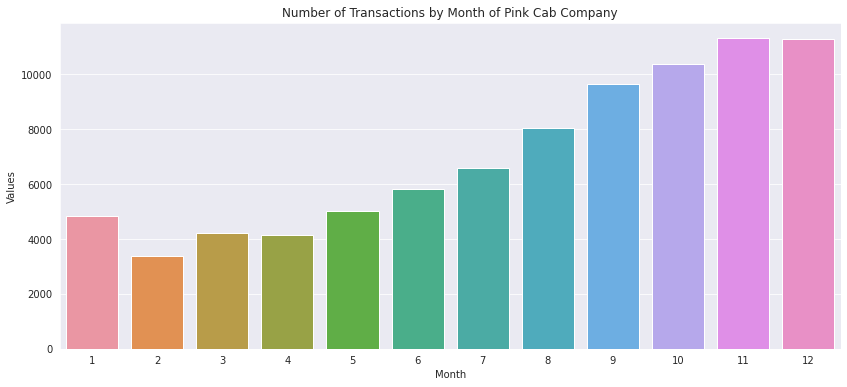

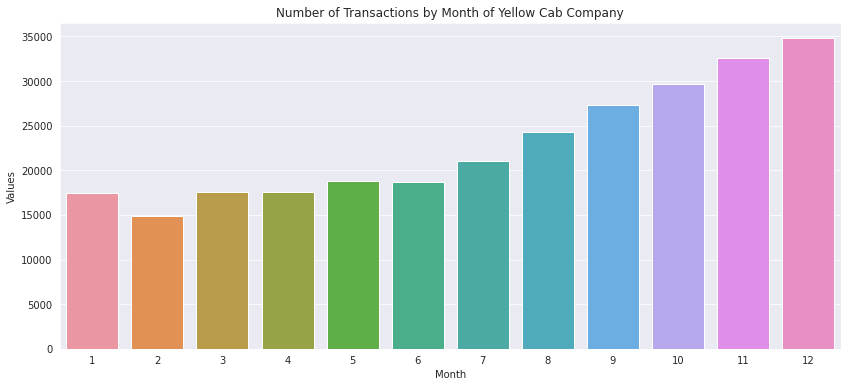

In [68]:

for i in range(len(values_companies)):
  plt.figure(figsize=(14,6))
  sns.set_style('darkgrid')
  sns.barplot(x=travel_plots_month_companies[i].index,y=travel_plots_month_companies[i].values)
  plt.title('Number of Transactions by Month of '+values_companies[i]+' Company',fontsize = 12)
  plt.xlabel('Month', fontsize = 10)
  plt.ylabel('Values',fontsize = 10)
  plt.show()

Yellow Cab has more trips (35,000) in the month of December compared to Pink Cab (11,000). It could be said that in the Holiday season, Yellow Cab has more advantage. 

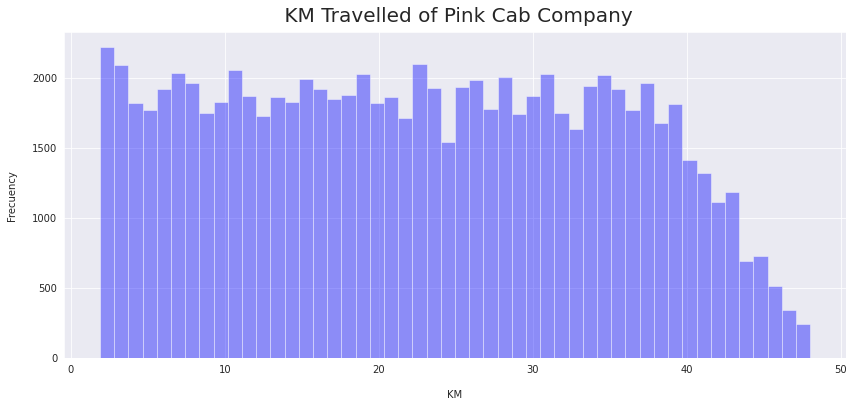

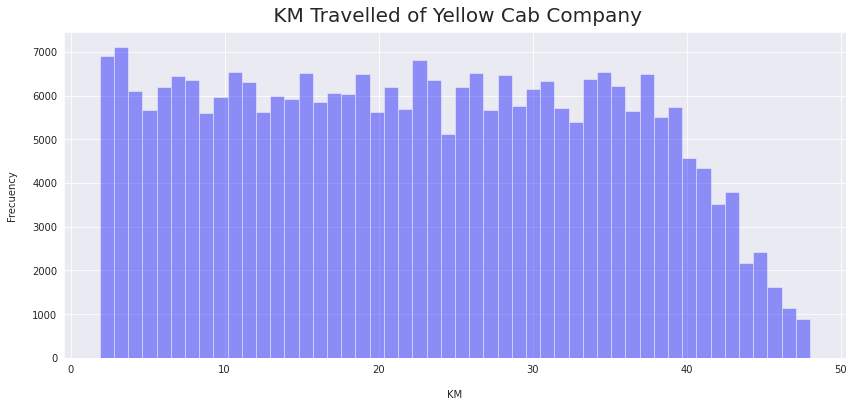

In [69]:
for i in range(len(values_companies)):
  plt.figure(figsize=(14,6))
  sns.set_style('darkgrid')
  ax = sns.distplot(info_companies[i]['KM_Travelled'], kde=False, color='blue', bins=50)
  plt.title(' KM Travelled of '+values_companies[i]+' Company', fontsize=20, y=1.012)
  plt.xlabel('KM', labelpad=15)
  plt.ylabel('Frecuency', labelpad=15)
  plt.show()

From the above graphs, it can be concluded that most of the trips are in the range of approximately 2 to 48 KM.

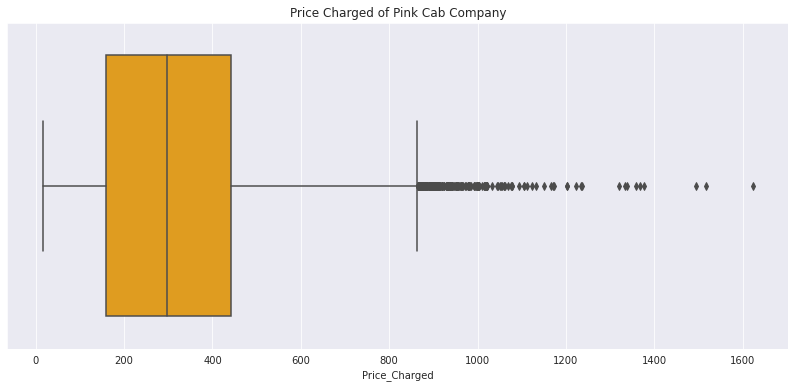

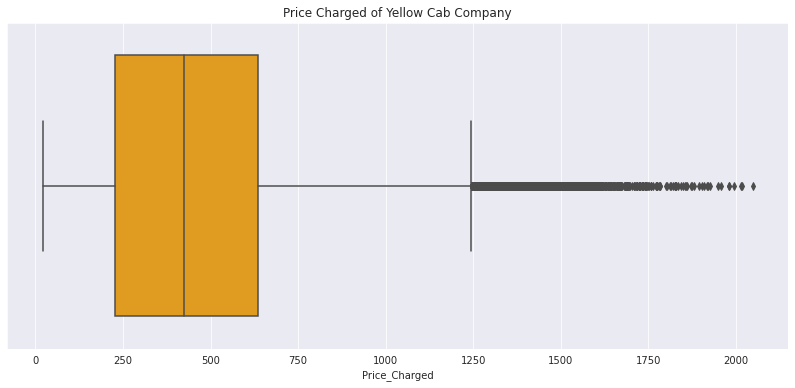

In [17]:
for i in range(len(values_companies)):
  plt.figure(figsize=(14,6))
  sns.set_style('darkgrid')
  ax = sns.boxplot(info_companies[i]['Price_Charged'], color="orange")
  plt.title('Price Charged of '+values_companies[i]+' Company',fontsize = 12)
  plt.show()



Outliers

*   These outliers are due to the use of high-end cars, so it has been decided to keep them.
*   The price range of the yellow cab is higher than that of the pink cab.





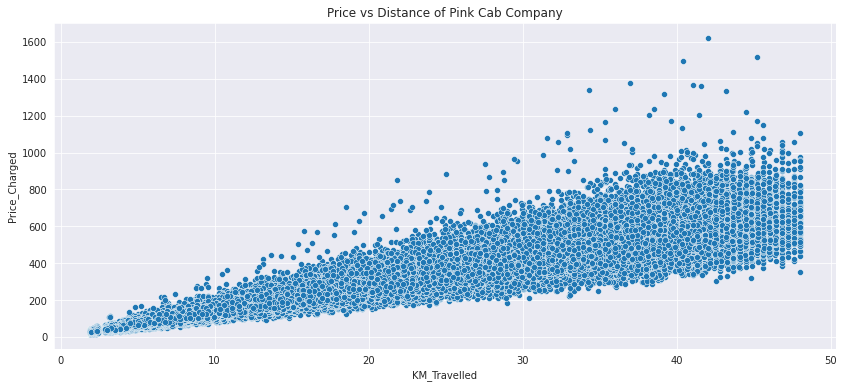

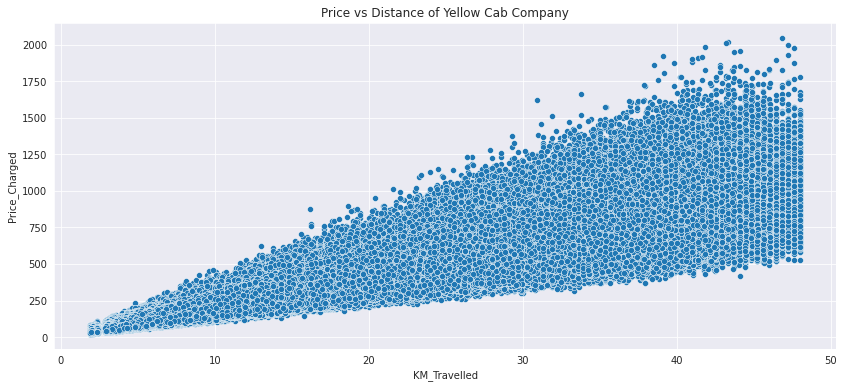

In [70]:
for i in range(len(values_companies)):
  plt.figure(figsize=(14,6))
  sns.set_style('darkgrid')
  ax = sns.scatterplot(info_companies[i]['KM_Travelled'],info_companies[i]['Price_Charged'])
  plt.title('Price vs Distance of '+values_companies[i]+' Company',fontsize = 12)
  plt.show()

We can see that there is a positive correlation in the graph for both pink cab and yellow cab.The price of yellow cab is higher than that of pink cab.
We can conclude that distance is an important factor in determining the price of the trips.

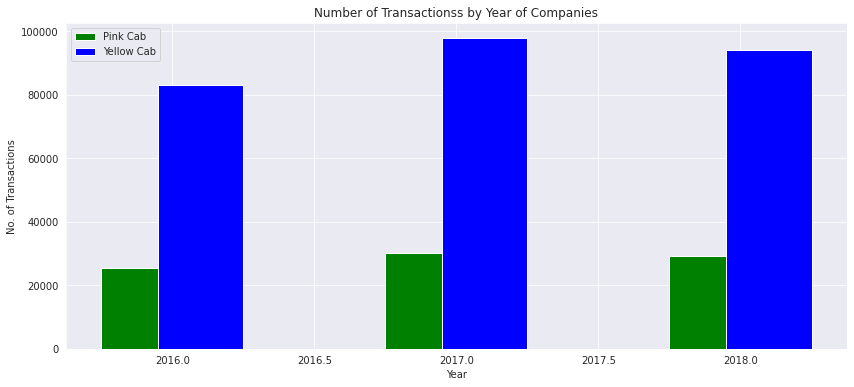

In [71]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
ax = plt.subplot(111)
ax.bar(travel_plots_year_companies[0].index-0.1,travel_plots_year_companies[0].values,  width=0.3, color='green', align='center',label=values_companies[0])
ax.bar(travel_plots_year_companies[1].index+0.1,travel_plots_year_companies[1].values,  width=0.3, color='blue', align='center',label=values_companies[1])
plt.title('Number of Transactionss by Year of Companies',fontsize = 12)
plt.xlabel('Year', fontsize = 10)
plt.ylabel('No. of Transactions',fontsize = 10)
plt.legend()
plt.show()

The graph shows that the number of annual transactions of the yellow cab is higher than that of the pink cab.

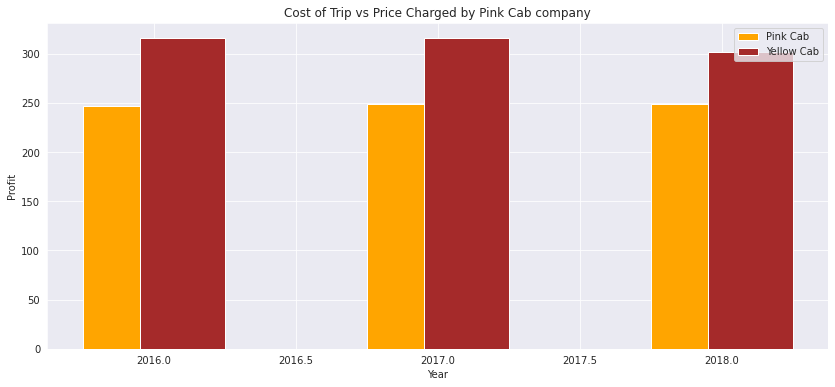

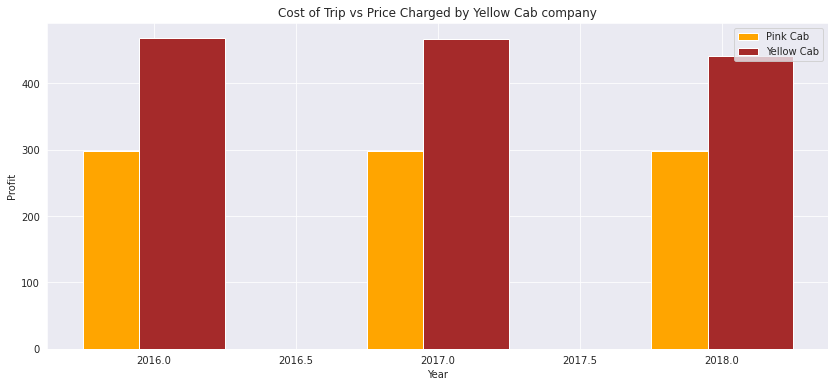

In [72]:
for i in range(len(values_companies)):
  plt.figure(figsize=(14,6))
  sns.set_style('darkgrid')
  ax = plt.subplot(111)
  ax.bar(travel_plots_year_companies[i].index-0.1,cost_trip_plots_year_companies[i].values,  width=0.3, color='orange', align='center',label=values_companies[0])
  ax.bar(travel_plots_year_companies[i].index+0.1,price_charged_plots_year_companies[i].values,  width=0.3, color='brown', align='center',label=values_companies[1])
  plt.title('Cost of Trip vs Price Charged by '+values_companies[i]+' company',fontsize = 12)
  plt.xlabel('Year', fontsize = 10)
  plt.ylabel('Profit',fontsize = 10)
  plt.legend()
  plt.show()

The yellow cab has a higher profit margin (price charged - cost of the trip) compared to the pink cab.

## **7. Creating the Master Data**

In [73]:
df_data = df_cab_data.merge(df_transaction, on='Transaction_ID', how='inner')
df_data = df_data.merge(df_customers, on='Customer_ID',how='inner')
df_data = df_data.merge(df_cities,on='City',how='inner')
df_data

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,1,2016,29290,Card,Male,28,10813,814885,24701
1,10351127,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,7,2018,29290,Cash,Male,28,10813,814885,24701
2,10412921,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,11,2018,29290,Card,Male,28,10813,814885,24701
3,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,1,2016,27703,Card,Male,27,9237,814885,24701
4,10320494,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,4,2018,27703,Card,Male,27,9237,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,3,2018,51406,Cash,Female,29,6829,418859,127001
359388,10319775,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,4,2018,51406,Cash,Female,29,6829,418859,127001
359389,10347676,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,7,2018,51406,Card,Female,29,6829,418859,127001
359390,10358624,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,8,2018,51406,Cash,Female,29,6829,418859,127001


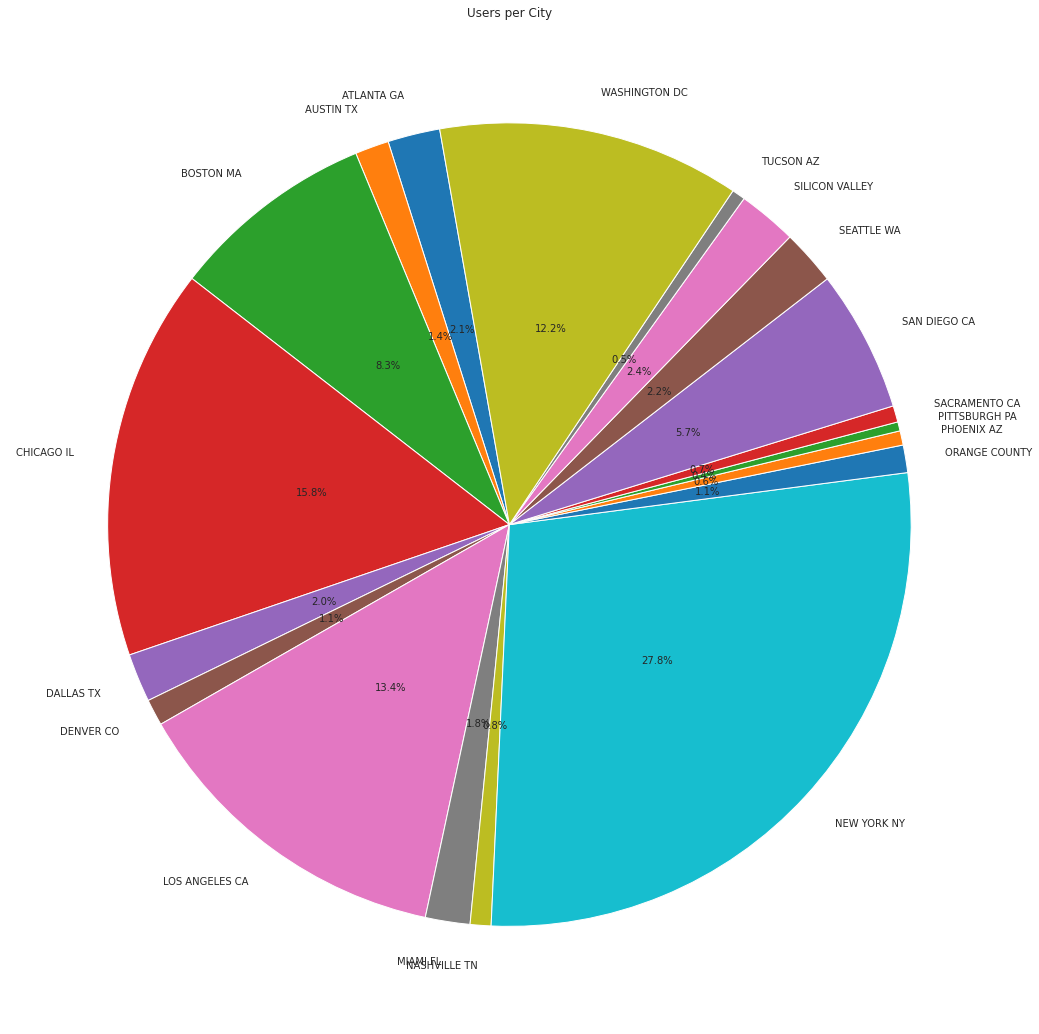

In [74]:
df_users_by_city = df_data.groupby('City').Users.count()
plt.figure(figsize=(18,25))
sns.set_style('darkgrid')
plt.pie(x=df_users_by_city.values ,labels=df_users_by_city.index,autopct='%.1f%%',pctdistance=0.5,startangle=100)
plt.title('Users per City')
plt.show()

New York City has the highest Cab users with 28% followed by Chicago with 16% and Los Angeles with 13%

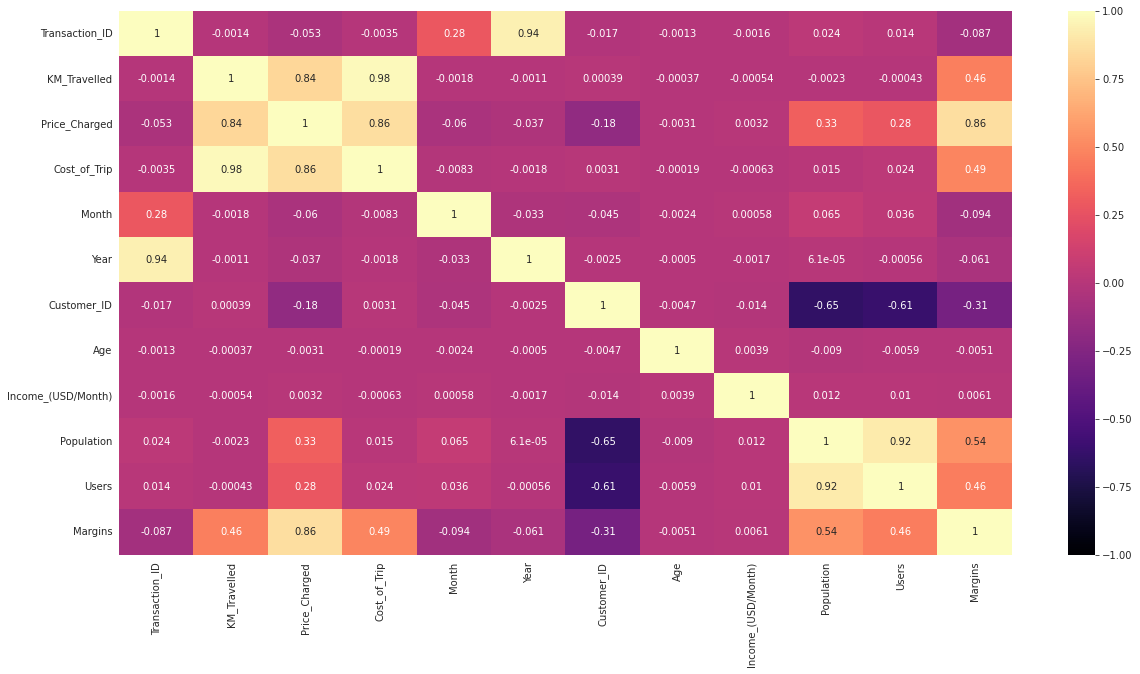

In [44]:
df_data['Margins'] = (df_data['Price_Charged']-df_data['Cost_of_Trip'])
plt.figure(figsize=(20,10))
sns.heatmap(df_data.corr(),annot=True,vmin=-1,vmax=1,cmap='magma')
plt.show()

There is a correlation between Margin & Price_Charged

In [47]:

a = df_data[(df_data.Gender=='Female')&(df_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = df_data[(df_data.Gender=='Male')&(df_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)


116000 158681
We accept alternate hypothesis that there is a statistical difference
P value is  6.060473042494144e-25


Yellow Cab: There is difference in Margin between Male and Female customers

In [48]:
a = df_data[(df_data.Gender=='Female')&(df_data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = df_data[(df_data.Gender=='Male')&(df_data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference')
else:
    print('We accept null hypothesis that there is no difference')
    
print('P value is ', p_value)

37480 47231
We accept null hypothesis that there is no difference
P value is  0.11515305900425798


Pink Cab: There is no difference in Margin between Male and Female customers

In [49]:
#Margins per Age
df_data[df_data.Age<=50].groupby('Company').Margins.mean()
df_data[df_data.Age>50].groupby('Company').Margins.mean()

Company
Pink Cab       62.053044
Yellow Cab    155.855885
Name: Margins, dtype: float64

In [50]:
#Pink Cab
a = df_data[(df_data.Age<=50)&(df_data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = df_data[(df_data.Age>50)&(df_data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

71228 13483
We accept null hypothesis that theres no difference
P value is  0.32817487547980695


In [51]:
#Yellow Cab
a = df_data[(df_data.Age<=50)&(df_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = df_data[(df_data.Age>50)&(df_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis')
    
print('P value is ', p_value)

231480 43201
We accept alternate hypothesis that theres a difference
P value is  6.494256817799368e-09



Yellow Cabs also gives discount to people older than 50

Is there difference in margins for Card payer and Cash payers


In [52]:
#Pink Cab
a = df_data[(df_data.Payment_Mode=='Cash')&(df_data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = df_data[(df_data.Payment_Mode=='Card')&(df_data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()

_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

We accept null hypothesis that theres no difference
P value is  0.7900465828793288


In [53]:
#Yellow Cab
a = df_data[(df_data.Payment_Mode=='Cash')&(df_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = df_data[(df_data.Payment_Mode=='Card')&(df_data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

We accept null hypothesis that there is no statistical difference
P value is  0.2933060638298729


There is no difference in Margin regarding mode of Payment for both Yellow & Pink Cab

In [54]:
df_data.to_csv('data.csv',index = False)